In [351]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [352]:
df = pd.read_csv('../input/heart-disease-uci/heart.csv')

In [353]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


1.  age: age in years
2.  sex: sex (1 = male; 0 = female)
3.  cp: chest pain type
    Value 1: typical angina
    Value 2: atypical angina
    Value 3: non-anginal pain
    Value 4: asymptomatic
4.  trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5.  chol: serum cholestoral in mg/dl
6.  fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7.  restecg: resting electrocardiographic results
    Value 0: normal
    Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8.  thalach: maximum heart rate achieved
9.  exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
    Value 1: upsloping
    Value 2: flat
    Value 3: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

 (TARGET VARIABLE)
14.  num: diagnosis of heart disease (angiographic disease status)
     Value 0: < 50% diameter narrowing
     Value 1: > 50% diameter narrowing

In [354]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [355]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [356]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Let's do some EDA(Exploratory Data Analysis)

<AxesSubplot:>

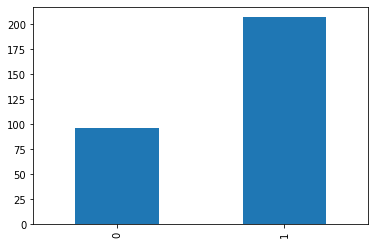

In [357]:
df['sex'].value_counts().plot.bar()

<AxesSubplot:>

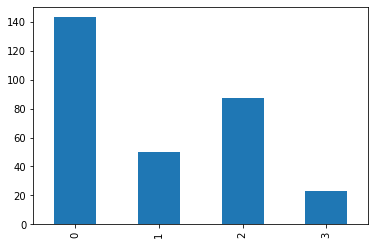

In [358]:
df['cp'].value_counts().plot.bar()

<AxesSubplot:>

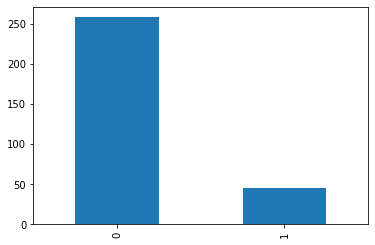

In [359]:
df['fbs'].value_counts().plot.bar()

<AxesSubplot:>

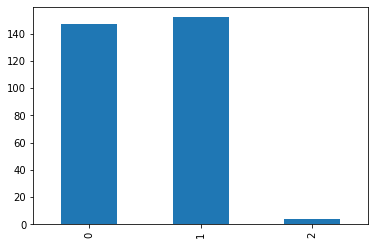

In [360]:
df['restecg'].value_counts().plot.bar()

<AxesSubplot:>

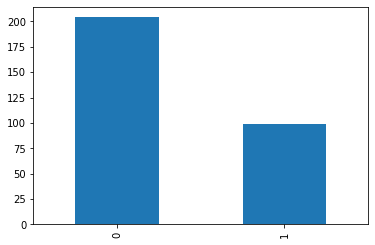

In [361]:
df['exang'].value_counts().plot.bar()

<AxesSubplot:>

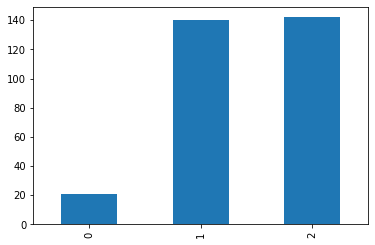

In [362]:
df['slope'].value_counts().plot.bar()

<AxesSubplot:>

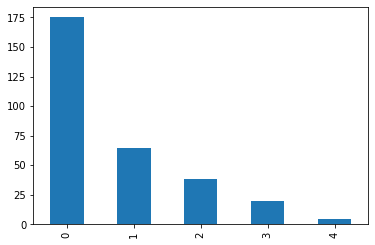

In [363]:
df['ca'].value_counts().plot.bar()

 ### as we can see in above plot there are 5 different categories but we already know that we have only 4 categories (0- 3) in ca,so for that we have to take additional category as a missing values

<AxesSubplot:>

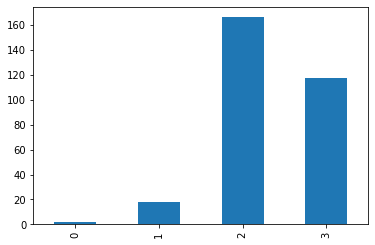

In [364]:
df['thal'].value_counts().plot.bar()

#### in this case i already know that catedory 0 represents the missing values other wise we have to find out which category represents a missing values.

<AxesSubplot:>

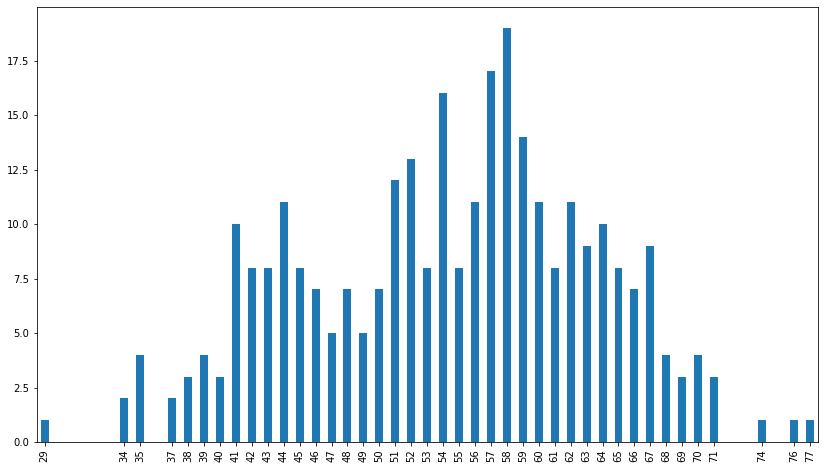

In [365]:
plt.figure(figsize=(14,8))
df['age'].value_counts().plot.bar()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

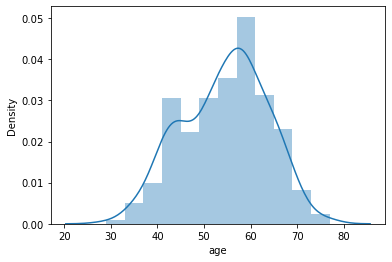

In [366]:
sns.distplot(df['age'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='trestbps', ylabel='Density'>

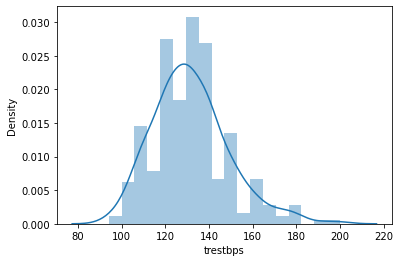

In [367]:
sns.distplot(df['trestbps'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='thalach', ylabel='Density'>

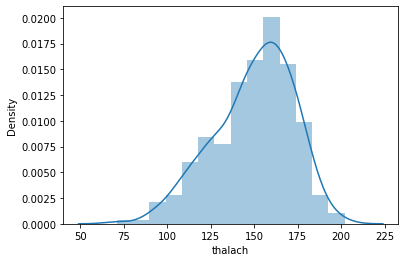

In [368]:
sns.distplot(df['thalach'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='chol', ylabel='Density'>

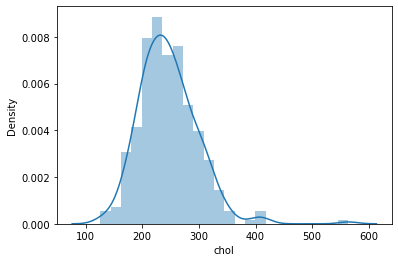

In [369]:
sns.distplot(df['chol'])

<AxesSubplot:>

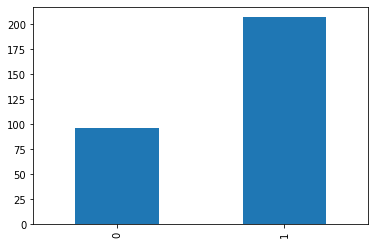

In [370]:
df['sex'].value_counts().plot.bar()

<AxesSubplot:>

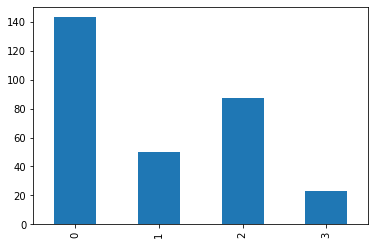

In [371]:
df['cp'].value_counts().plot.bar()

<AxesSubplot:>

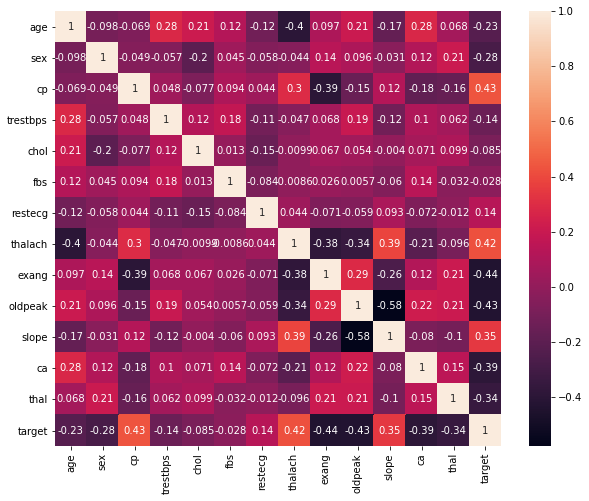

In [372]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [373]:
df.corr()['target']

age        -0.225439
sex        -0.280937
cp          0.433798
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalach     0.421741
exang      -0.436757
oldpeak    -0.430696
slope       0.345877
ca         -0.391724
thal       -0.344029
target      1.000000
Name: target, dtype: float64

<AxesSubplot:xlabel='age', ylabel='count'>

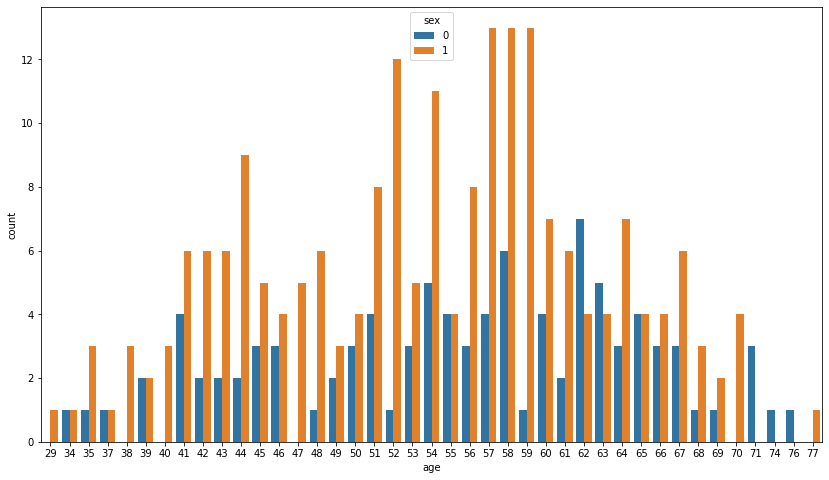

In [374]:
plt.figure(figsize=(14,8))
sns.countplot(x=df['age'], hue=df['sex'], data=df)

<AxesSubplot:xlabel='age', ylabel='sex'>

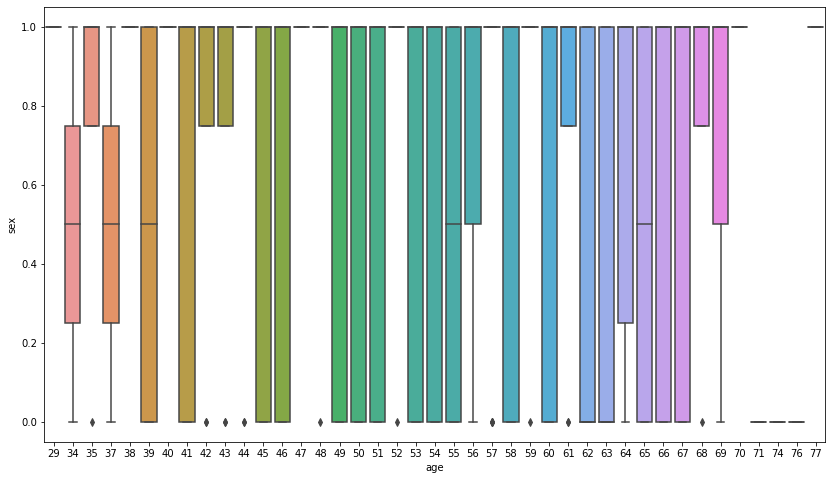

In [375]:
plt.figure(figsize=(14,8))
sns.boxplot(x=df['age'], y=df['sex'], data=df)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='chol'>

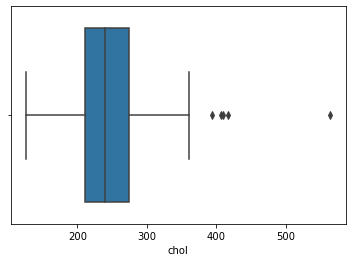

In [376]:
sns.boxplot(df['chol'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='age'>

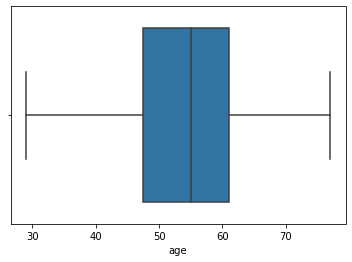

In [377]:
sns.boxplot(df['age'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='thalach'>

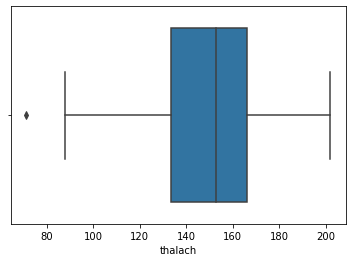

In [378]:
sns.boxplot(df['thalach'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='trestbps'>

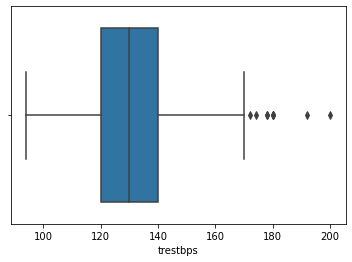

In [379]:
sns.boxplot(df['trestbps'])

<AxesSubplot:xlabel='age', ylabel='count'>

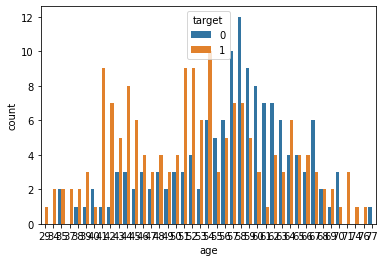

In [380]:
sns.countplot(x = df['age'], hue=df['target'], data=df)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


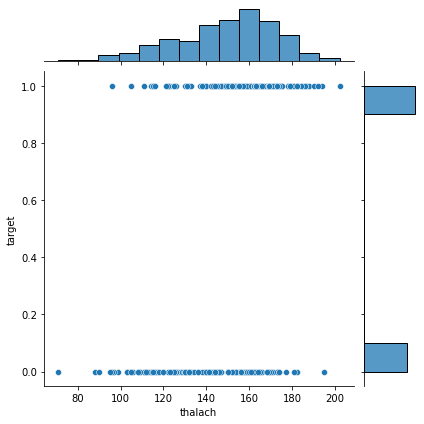

In [381]:
sns.jointplot(df['thalach'], df['target'])

# Identify and Deal with the missing values

### We have find it out that we have 2 features named ca and thal have missing values in it so we have to first deal with it

In [382]:
df['ca'].value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

In [383]:
df['thal'].value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

### so now we remove the records which is containing value 4 in "ca" and the records which is containing value 0 in "thal"

In [384]:
len(df.loc[(df['ca'] == 4) | (df['thal'] == 0)])

7

In [385]:
remove_it = df.loc[(df['ca'] == 4) | (df['thal'] == 0)]

#### as we can see there are 7 records which are relatively fewer so we can simply remove it.

In [386]:
df_no_missing = df.loc[(df['ca'] != 4) & (df['thal'] != 0)]

In [387]:
len(df_no_missing)

296

In [388]:
df_no_missing['ca'].nunique()

4

In [389]:
df_no_missing['thal'].nunique()

3

## Now we split the data into dependent and independent variables

In [390]:
X = df_no_missing.drop('target', axis=1)
y = df_no_missing['target']

In [391]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [392]:
y.head

<bound method NDFrame.head of 0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 296, dtype: int64>

## now i am going to do one hot encoding for the categorical data

In [393]:
X_encoded = pd.get_dummies(X, columns=['sex','cp','fbs','restecg','exang','slope','ca','thal'], drop_first=True)
X_encoded.head()

,age,trestbps,chol,thalach,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,thal_2,thal_3
0,63,145,233,150,2.3,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0
1,37,130,250,187,3.5,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,56,120,236,178,0.8,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0
4,57,120,354,163,0.6,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0


In [394]:
X_encoded.shape

(296, 20)

In [395]:
y.unique()

array([1, 0])

# Build A Preliminary Classification Tree

In [396]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=8)

In [397]:
print("X_train size = ", X_train.shape)
print("X_test size= ", X_test.shape)
print("y_train size = ", y_train.shape)
print("y_test size = ", y_test.shape)

X_train size =  (222, 13)
X_test size=  (74, 13)
y_train size =  (222,)
y_test size =  (74,)


In [398]:
dt_clf = DecisionTreeClassifier(random_state=8)
df_clf = dt_clf.fit(X_train, y_train)

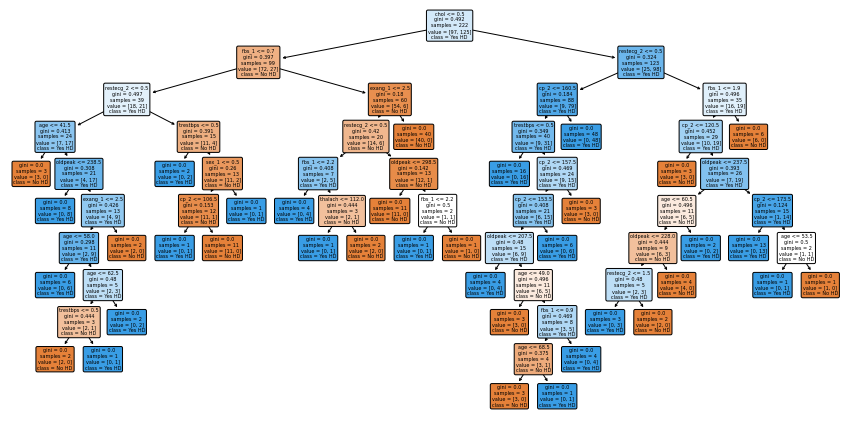

In [399]:
from sklearn import tree
fig = plt.figure(figsize=(15,7.5))
tree.plot_tree(dt_clf, 
               filled=True,
               rounded=True,
               class_names=['No HD','Yes HD'],
               feature_names=X_encoded.columns);

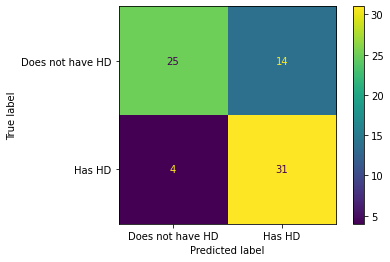

In [400]:
plot_confusion_matrix(dt_clf, X_test, y_test, display_labels=['Does not have HD','Has HD'])

# Cost Complexity Pruning Part 1: Visualize alpha

In [401]:
path = dt_clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[0:-1]

dts_clf = []

for ccp_alpha in ccp_alphas:
    dt_clf = DecisionTreeClassifier(random_state=8, ccp_alpha=ccp_alpha)
    dt_clf.fit(X_train, y_train)
    dts_clf.append(dt_clf)

### Now let's see graph the accuracy of the trees using training dataset and the testing dataset as a function of alpha.

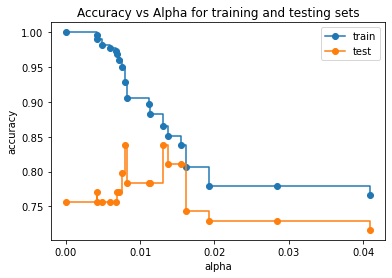

In [402]:
train_scores = [dt_clf.score(X_train, y_train) for dt_clf in dts_clf]
test_scores = [dt_clf.score(X_test, y_test) for dt_clf in dts_clf]

fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs Alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o',label='train', drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label='test',drawstyle='steps-post')
ax.legend()
plt.show()

# Cost Complexity pruning part 2:Cross Validation for finding the best alpha

<AxesSubplot:xlabel='tree'>

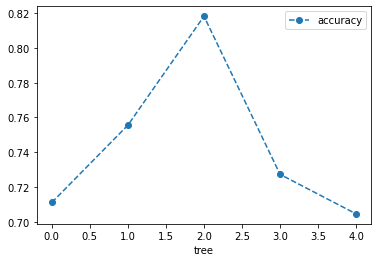

In [403]:
dt_clf = DecisionTreeClassifier(random_state=8, ccp_alpha=0.015)

scores = cross_val_score(dt_clf, X_train, y_train, cv=5)
df = pd.DataFrame(data={'tree':range(5), 'accuracy':scores})

df.plot(x='tree',y='accuracy', marker='o', linestyle='--')

#### The graph above shows that using different Trainig and Tesing data with the same alpha resulted in different accuracies, suggesting that alpha is sensitive to the datasets so, instead  of picking a single Training and Testing dataset, let's use cross validation to find the optimal value for ccp_aplha.

<AxesSubplot:xlabel='alpha'>

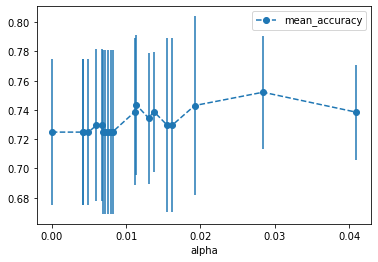

In [404]:
# create an array to score the results of each fold during cross validation
alpha_loop_values = []

# for each candidate value for alpha, we will run 5-fold cross validation.
# Then we will store the mean and standard daviation of scores(the accuracy) for each call
for ccp_alpha in ccp_alphas:
    dt_clf = DecisionTreeClassifier(random_state=8,ccp_alpha=ccp_alpha)
    scores = cross_val_score(dt_clf, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
    
# Now we can draw a graph of mean and standard deviation of the scores
# For each candidate value for alpha
alpha_results = pd.DataFrame(alpha_loop_values,
                             columns=['alpha','mean_accuracy','std'])

alpha_results.plot(x='alpha',
                   y='mean_accuracy',
                   yerr='std',
                   marker='o',
                   linestyle='--')
                  

### using cross validation, we can see that, over all, instead of setting ccp_alpha=0.015, we need to set it to something closer to 0.019.we can see exact value with

In [405]:
alpha_results[(alpha_results['alpha'] > 0.017)
             &
             (alpha_results['alpha'] < 0.02)]

,alpha,mean_accuracy,std
17,0.019225,0.74303,0.061054


In [406]:
ideal_ccp_alpha = alpha_results[(alpha_results['alpha'] > 0.017)
                                 &
                                (alpha_results['alpha'] < 0.02)]['alpha']

In [407]:
ideal_ccp_alpha

17    0.019225
Name: alpha, dtype: float64

In [408]:
ideal_ccp_alpha = float(ideal_ccp_alpha)
ideal_ccp_alpha

0.019225136466515767

# Build, Evaluating, Drawing the Final Classification 

In [409]:
# now we have a idea value of alpha we can build the final classification tree by setting ccp_alpha=ccp_alpha:

pruned_dt_clf = DecisionTreeClassifier(random_state=8, ccp_alpha=ideal_ccp_alpha)
pruned_dt_clf = pruned_dt_clf.fit(X_train, y_train)

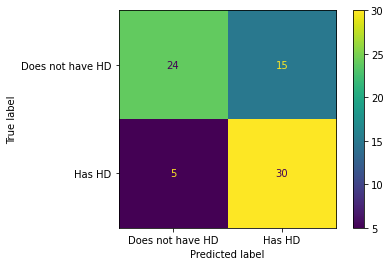

In [410]:
plot_confusion_matrix(pruned_dt_clf,
                     X_test,
                     y_test,
                     display_labels=['Does not have HD','Has HD'])

In [420]:
train_accuracy = pruned_dt_clf.score(X_train, y_train)

In [ ]:
print("Train Accuracy = {:0.2f} % ".format(train_accuracy*100))

In [413]:
accuracy = pruned_dt_clf.score(X_test, y_test)

In [419]:
print("Test Accuracy = {:0.2f} % ".format(accuracy*100))

Test Accuracy = 72.97 % 


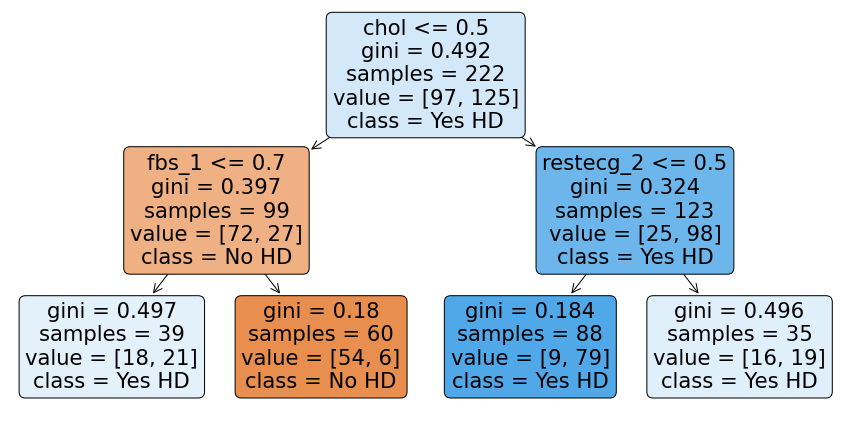

In [411]:
from sklearn import tree
fig = plt.figure(figsize=(15,7.5))
tree.plot_tree(pruned_dt_clf, 
               filled=True,
               rounded=True,
               class_names=['No HD','Yes HD'],
               feature_names=X_encoded.columns);